In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive"

Mounted at /content/drive
MyDrive


In [ ]:
!ls /content/drive/MyDrive/datasets/kaggle/

churn_prediction.csv  OnlineRetail.csv	WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/kaggle/OnlineRetail.csv',encoding='unicode_escape',dtype={'CustomerID':str})

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [ ]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
JAM JAR WITH BLUE LID                    1
samples/damages                          1
72 CAKE CASES VINTAGE CHRISTMAS          1
for online retail orders                 1
SET 10 CARDS TRIANGLE ICONS  17220       1
Name: Description, Length: 4223, dtype: int64

In [ ]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data['CustomerID'].value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15590       1
15524       1
16765       1
17307       1
13829       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
data_2 = data[data['CustomerID'].isna()]
data_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
data_2 = data[data['Description'].isna()]
data_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [ ]:
del data_2

In [ ]:
#remove rows containing NaN customer Ids and Descriptions 

data.dropna(axis=0,how='any',inplace=True)

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data_customer = data[['CustomerID','InvoiceDate']]
data_customer['Last_Buying_Date'] = pd.to_datetime(data_customer.InvoiceDate)
data_customer.drop(labels='InvoiceDate',axis=1,inplace=True)
data_customer_recency = data_customer.groupby(by='CustomerID').Last_Buying_Date.max().reset_index()
data_customer_recency.columns = ['CustomerID','Last_Buying_Date']
del data_customer
data_customer_recency

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CustomerID,Last_Buying_Date
0,12346,2011-01-18 10:17:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4367,18280,2011-03-07 09:52:00
4368,18281,2011-06-12 10:53:00
4369,18282,2011-12-02 11:43:00
4370,18283,2011-12-06 12:02:00


In [ ]:
data = data.join(data_customer_recency.set_index('CustomerID'),on='CustomerID')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2011-02-10 14:38:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2011-02-10 14:38:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2011-02-10 14:38:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2011-02-10 14:38:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2011-02-10 14:38:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,2011-12-09 12:50:00


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-02-10 14:38:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-02-10 14:38:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00


In [ ]:
data['Recency'] = data['Last_Buying_Date']-data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-02-10 14:38:00,71 days 06:12:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71 days 06:12:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-02-10 14:38:00,71 days 06:12:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71 days 06:12:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71 days 06:12:00


In [ ]:
data['Recency'] = pd.to_numeric(data.Recency.dt.days)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-02-10 14:38:00,71
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-02-10 14:38:00,71
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09 12:50:00,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-09 12:50:00,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09 12:50:00,0


In [ ]:
data.dtypes

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                  object
Country                     object
Last_Buying_Date    datetime64[ns]
Recency                      int64
dtype: object

In [ ]:
data_customer_recency = data[data['Recency']>0]
data_customer_recency

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date,Recency,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-02-10 14:38:00,71,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-02-10 14:38:00,71,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34
...,...,...,...,...,...,...,...,...,...,...,...
534292,581143,23250,VINTAGE RED TRIM ENAMEL BOWL,31,2011-12-07 13:46:00,1.25,17490,United Kingdom,2011-12-09 09:08:00,1,38.75
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,2011-12-09 09:08:00,1,-9.95
534309,C581145,35970,ZINC FOLKART SLEIGH BELLS,-12,2011-12-07 13:48:00,1.69,17490,United Kingdom,2011-12-09 09:08:00,1,-20.28
534310,C581145,23249,VINTAGE RED ENAMEL TRIM PLATE,-9,2011-12-07 13:48:00,1.49,17490,United Kingdom,2011-12-09 09:08:00,1,-13.41


In [ ]:
data_customer_recency = data_customer_recency[['CustomerID','Recency']]
data_customer_recency

,CustomerID,Recency
0,17850,71
1,17850,71
2,17850,71
3,17850,71
4,17850,71
...,...,...
534292,17490,1
534308,17490,1
534309,17490,1
534310,17490,1


In [ ]:

data_customer_recency = data_customer_recency.groupby(by='CustomerID').Recency.min().reset_index()
data_customer_recency.columns = ['CustomerID','Recency']
data_customer_recency

,CustomerID,Recency
0,12347,37
1,12348,173
2,12352,35
3,12356,222
4,12358,149
...,...,...
2975,18276,22
2976,18277,260
2977,18282,114
2978,18283,5


In [ ]:
#include recency = 0  in the dataframe also

data_recency_zero = data.groupby('CustomerID').Recency.max().reset_index() #so for custid with only zero can be filtered by this approach
data_recency_zero.columns = ['CustomerID','Recency']
data_recency_zero = data_recency_zero[data_recency_zero['Recency']== 0]
data_customer_recency = data_customer_recency.append(data_recency_zero)

In [ ]:
data_customer_recency.Recency.describe()

count    4372.000000
mean       44.012351
std        67.717359
min         0.000000
25%         0.000000
50%        13.000000
75%        59.000000
max       365.000000
Name: Recency, dtype: float64

(array([2884.,  587.,  314.,  172.,  165.,   83.,   65.,   37.,   35.,
          30.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <a list of 10 Patch objects>)

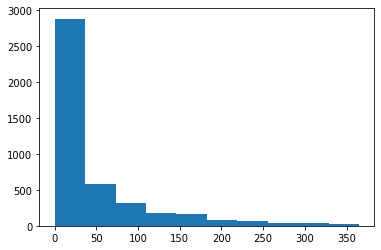

In [ ]:
plt.hist(data_customer_recency.Recency)

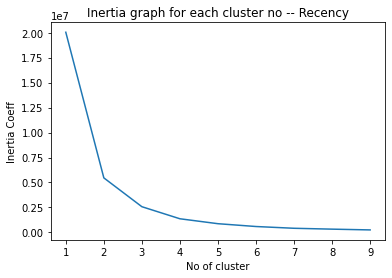

In [ ]:
from sklearn.cluster import KMeans


c = {}
for k in range(1,10):
  model = KMeans(n_clusters=k,max_iter=500,algorithm="full")
  model.fit(data_customer_recency[['Recency']])
  c[k] = model.inertia_

plt.plot(list(c.keys()),list(c.values()))
plt.xlabel("No of cluster")
plt.ylabel("Inertia Coeff")
plt.title("Inertia graph for each cluster no -- Recency")
plt.show()



In [ ]:
#add the cluster labels for recency cluster. k = 4 as determined by elbow method

model = KMeans(n_clusters=4,max_iter=500,algorithm="full")
model.fit(data_customer_recency[['Recency']])
data_customer_recency['cluster_no'] = model.labels_
data_customer_recency


,CustomerID,Recency,cluster_no
0,12347,37,0
1,12348,173,1
2,12352,35,0
3,12356,222,3
4,12358,149,1
...,...,...,...
4355,18262,0,0
4358,18268,0,0
4366,18278,0,0
4367,18280,0,0


In [ ]:
data_customer_recency.groupby('cluster_no').Recency.mean()

cluster_no
0      7.692520
1    157.376559
2     66.883721
3    279.053892
Name: Recency, dtype: float64

In [ ]:
model.cluster_centers_

array([[  7.69251982],
       [157.3765586 ],
       [ 66.88372093],
       [279.05389222]])

In [ ]:
# Low recency are customers of very high value i.e <=18.95, greater than 18.95 and less than 79.81 is high value customers
#between 116-255 is medium value, and greater than 255 is low value
data_customer_recency['cluster_labels'] = 'High'
data_customer_recency.loc[data_customer_recency['cluster_no'] == 0,'cluster_labels'] = 'Very High'
data_customer_recency.loc[data_customer_recency['cluster_no'] == 1,'cluster_labels'] = 'Medium'
data_customer_recency.loc[data_customer_recency['cluster_no'] == 2,'cluster_labels'] = 'High'
data_customer_recency.loc[data_customer_recency['cluster_no'] == 3,'cluster_labels'] = 'Low'
data_customer_recency.cluster_labels.value_counts()




Very High    2901
High          903
Medium        401
Low           167
Name: cluster_labels, dtype: int64

In [ ]:
#calculate frequency

data_customer_frequency = data[['CustomerID','InvoiceNo']]
data_customer_frequency = data_customer_frequency.groupby('CustomerID').InvoiceNo.nunique().reset_index()
data_customer_frequency.columns = ['CustomerID','Frequency']
data_customer_frequency

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


(array([381.,  89.,  28.,  14.,   9.,   4.,   3.,   3.,   0.,   0.,   2.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220]),
 <a list of 21 Patch objects>)

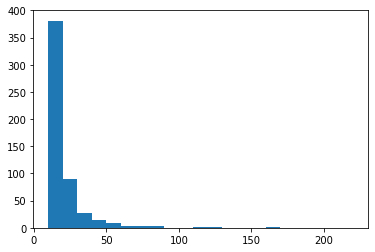

In [ ]:
plt.hist(data_customer_frequency.Frequency,bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220])

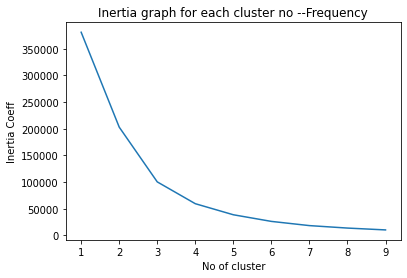

In [ ]:
#find no of clusters for frequency

c = {}
for k in range(1,10):
  model = KMeans(n_clusters=k,max_iter=500,algorithm="full")
  model.fit(data_customer_frequency[['Frequency']])
  c[k] = model.inertia_

plt.plot(list(c.keys()),list(c.values()))
plt.xlabel("No of cluster")
plt.ylabel("Inertia Coeff")
plt.title("Inertia graph for each cluster no --Frequency")
plt.show()


In [ ]:
#observe cluster with 4 or 5 means

model = KMeans(n_clusters=4,max_iter=500,algorithm="full")
model.fit(data_customer_frequency[['Frequency']])
model.cluster_centers_

array([[  2.94550196],
       [ 48.65306122],
       [167.5       ],
       [ 15.57053942]])

In [ ]:
  model = KMeans(n_clusters=5,max_iter=500,algorithm="full")
  model.fit(data_customer_frequency[['Frequency']])
  model.cluster_centers_

array([[  2.64980759],
       [ 34.        ],
       [213.66666667],
       [ 12.24358974],
       [ 86.58333333]])

In [ ]:
# Using 4 cluster as like recency
model = KMeans(n_clusters=4,max_iter=500,algorithm="full")
model.fit(data_customer_frequency[['Frequency']])
data_customer_frequency['cluster_no'] = model.labels_
data_customer_frequency



,CustomerID,Frequency,cluster_no
0,12346,2,0
1,12347,7,0
2,12348,4,0
3,12349,1,0
4,12350,1,0
...,...,...,...
4367,18280,1,0
4368,18281,1,0
4369,18282,3,0
4370,18283,16,2


In [ ]:
data_customer_frequency.groupby('cluster_no').Frequency.mean()

cluster_no
0      2.816511
1     48.320000
2     14.604278
3    167.500000
Name: Frequency, dtype: float64

In [ ]:
data_customer_frequency.cluster_no.value_counts()

0    3755
2     561
1      50
3       6
Name: cluster_no, dtype: int64

In [ ]:
# Low frequency customers of low value i.e <=2.81, greater than 2.94 and less than 15.57 is medium value customers
#between 48.65-167.5 is high value, and greater than 167.50 is very_high

data_customer_frequency['cluster_labels'] = 'Low'
data_customer_frequency.loc[data_customer_frequency['cluster_no']==0,'cluster_labels'] = 'Low'
data_customer_frequency.loc[data_customer_frequency['cluster_no']==1,'cluster_labels'] = 'High'
data_customer_frequency.loc[data_customer_frequency['cluster_no']==2,'cluster_labels'] = 'Medium'
data_customer_frequency.loc[data_customer_frequency['cluster_no']==3,'cluster_labels'] = 'Very High'
data_customer_frequency.cluster_labels.value_counts()

Low          3755
Medium        561
High           50
Very High       6
Name: cluster_labels, dtype: int64

In [ ]:
#Find value by multiplying unit price * quantity

data['Total_amount'] = data['Quantity']*data['UnitPrice']

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Last_Buying_Date,Recency,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2011-02-10 14:38:00,71,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2011-02-10 14:38:00,71,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2011-02-10 14:38:00,71,20.34


In [ ]:
#find monetary value customer

data_customer_value = data[['CustomerID','Total_amount']]
data_customer_value = data_customer_value.groupby('CustomerID').Total_amount.sum().reset_index()
data_customer_value.columns = ['CustomerID','Total_amount']
data_customer_value

,CustomerID,Total_amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88


(array([166.,  43.,  15.,   5.,   8.,   6.,   1.,   1.,   0.,   6.,   3.]),
 array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
        50000, 55000, 60000]),
 <a list of 11 Patch objects>)

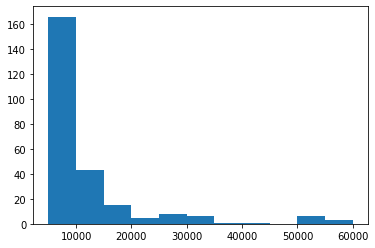

In [ ]:
plt.hist(data_customer_value['Total_amount'],bins=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000])

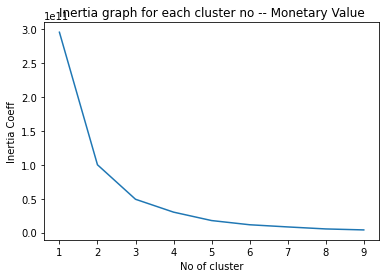

In [ ]:
#find cluster no for monetary value

c = {}
for k in range(1,10):
  model = KMeans(n_clusters=k,max_iter=500,algorithm="full")
  model.fit(data_customer_value[['Total_amount']])
  c[k] = model.inertia_

plt.plot(list(c.keys()),list(c.values()))
plt.xlabel("No of cluster")
plt.ylabel("Inertia Coeff")
plt.title("Inertia graph for each cluster no -- Monetary Value")
plt.show()

In [ ]:
#using 4 clusters for values
model = KMeans(n_clusters=4,max_iter=500,algorithm="full")
model.fit(data_customer_value[['Total_amount']])
data_customer_value['cluster_no'] = model.labels_
data_customer_value.cluster_no.value_counts()

0    4236
3     118
1      15
2       3
Name: cluster_no, dtype: int64

In [ ]:
model.cluster_centers_

array([[  1133.43137521],
       [ 71423.516     ],
       [241136.56      ],
       [ 14329.59260504]])

In [ ]:
data_customer_value.groupby('cluster_no').Total_amount.mean()

cluster_no
0      1134.984243
1     71423.516000
2    241136.560000
3     14385.679153
Name: Total_amount, dtype: float64

In [ ]:
# Adding labels to Values ,
#<=1134.98 == Low
# >1134.98 and <=14385.67 == Medium
# >14385.67 and <=71423.51 == High
# > 71423.51 is Very High

data_customer_value['cluster_labels'] = 'Low'
data_customer_value.loc[data_customer_value['cluster_no'] == 0,'cluster_labels'] = 'Low'
data_customer_value.loc[data_customer_value['cluster_no'] == 1,'cluster_labels'] = 'High'
data_customer_value.loc[data_customer_value['cluster_no'] == 2,'cluster_labels'] = 'Very High'
data_customer_value.loc[data_customer_value['cluster_no'] == 3,'cluster_labels'] = 'Medium'
data_customer_value.cluster_labels.value_counts()

Low          4236
Medium        118
High           15
Very High       3
Name: cluster_labels, dtype: int64

In [ ]:
data_customer_recency.rename(columns={'cluster_labels':'cluster_labels_recency','cluster_no':'cluster_no_recency'},inplace=True)
data_customer_frequency.rename(columns={'cluster_labels':'cluster_labels_frequency','cluster_no':'cluster_no_frequency'},inplace=True)
data_customer_value.rename(columns={'cluster_labels':'cluster_labels_value','cluster_no':'cluster_no_value'},inplace=True)

result =  data_customer_recency
result = result.join(data_customer_frequency.set_index('CustomerID'),on='CustomerID')
result = result.join(data_customer_value.set_index('CustomerID'),on='CustomerID')
result


,CustomerID,Recency,cluster_no_recency,cluster_labels_recency,Frequency,cluster_no_frequency,cluster_labels_frequency,Total_amount,cluster_no_value,cluster_labels_value
0,12347,37,0,Very High,7,0,Low,4310.00,0,Low
1,12348,173,1,Medium,4,0,Low,1797.24,0,Low
2,12352,35,0,Very High,11,2,Medium,1545.41,0,Low
3,12356,222,3,Low,3,0,Low,2811.43,0,Low
4,12358,149,1,Medium,2,0,Low,1168.06,0,Low
...,...,...,...,...,...,...,...,...,...,...
4355,18262,0,0,Very High,1,0,Low,149.48,0,Low
4358,18268,0,0,Very High,2,0,Low,0.00,0,Low
4366,18278,0,0,Very High,1,0,Low,173.90,0,Low
4367,18280,0,0,Very High,1,0,Low,180.60,0,Low


In [ ]:
result.drop(labels=['Recency','cluster_no_recency','Frequency','cluster_no_frequency','Total_amount','cluster_no_value'],axis=1,inplace=True)
result

,CustomerID,cluster_labels_recency,cluster_labels_frequency,cluster_labels_value
0,12347,Very High,Low,Low
1,12348,Medium,Low,Low
2,12352,Very High,Medium,Low
3,12356,Low,Low,Low
4,12358,Medium,Low,Low
...,...,...,...,...
4355,18262,Very High,Low,Low
4358,18268,Very High,Low,Low
4366,18278,Very High,Low,Low
4367,18280,Very High,Low,Low


In [ ]:
result['RFM_labels']  = result['cluster_labels_recency']+'_'+result['cluster_labels_frequency']+'_'+result['cluster_labels_value']
result 
# created a RFM label by concatinating all labels

,CustomerID,cluster_labels_recency,cluster_labels_frequency,cluster_labels_value,RFM_labels
0,12347,Very High,Low,Low,Very High_Low_Low
1,12348,Medium,Low,Low,Medium_Low_Low
2,12352,Very High,Medium,Low,Very High_Medium_Low
3,12356,Low,Low,Low,Low_Low_Low
4,12358,Medium,Low,Low,Medium_Low_Low
...,...,...,...,...,...
4355,18262,Very High,Low,Low,Very High_Low_Low
4358,18268,Very High,Low,Low,Very High_Low_Low
4366,18278,Very High,Low,Low,Very High_Low_Low
4367,18280,Very High,Low,Low,Very High_Low_Low


In [ ]:
result.RFM_labels.value_counts()

Very High_Low_Low             2385
High_Low_Low                   796
Medium_Low_Low                 395
Very High_Medium_Low           382
Low_Low_Low                    167
High_Medium_Low                 95
Very High_Medium_Medium         69
Very High_High_Medium           27
Very High_High_Low              11
Very High_High_High              8
High_Medium_Medium               7
Very High_Low_Medium             6
Medium_Medium_Low                4
Very High_Medium_High            4
High_Low_Medium                  4
Very High_Very High_Medium       3
Very High_Very High_High         3
Very High_High_Very High         3
Medium_Low_Medium                2
High_High_Low                    1
Name: RFM_labels, dtype: int64

In [ ]:
customer_segments.index

Index(['Very High_Low_Low', 'High_Low_Low', 'Medium_Low_Low',
       'Very High_Medium_Low', 'Low_Low_Low', 'High_Medium_Low',
       'Very High_Medium_Medium', 'Very High_High_Medium',
       'Very High_High_Low', 'Very High_High_High', 'High_Medium_Medium',
       'Very High_Low_Medium', 'Medium_Medium_Low', 'Very High_Medium_High',
       'High_Low_Medium', 'Very High_Very High_Medium',
       'Very High_Very High_High', 'Very High_High_Very High',
       'Medium_Low_Medium', 'High_High_Low'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7fc0d321bfd0>,
 [Text(-0.156759635582479, 1.088772894892249, 'Very High_Low_Low'),
  Text(-0.7193688852261274, -0.8321709000971608, 'High_Low_Low'),
  Text(0.15675961009790976, -1.088772898561473, 'Medium_Low_Low'),
  Text(0.7097538358554613, -0.8403865137473704, 'Very High_Medium_Low'),
  Text(0.9782343118082879, -0.503048338831335, 'Low_Low_Low'),
  Text(1.0550974504736246, -0.3110777555596949, 'High_Medium_Low'),
  Text(1.084353909570797, -0.1848691396597279, 'Very High_Medium_Medium'),
  Text(1.0945175959231812, -0.10968697376872004, 'Very High_High_Medium'),
  Text(1.0971042918724654, -0.07976322934169802, 'Very High_High_Low'),
  Text(1.098091004750828, -0.06477766038779631, 'Very High_High_High'),
  Text(1.0987254153966888, -0.05293828068018048, 'High_Medium_Medium'),
  Text(1.099171988859061, -0.042672460763548366, 'Very High_Low_Medium'),
  Text(1.0994502407265234, -0.034773095438715415, 'Medium_Medium_Low'),
  Text(1.0996319689559395, -0.02845

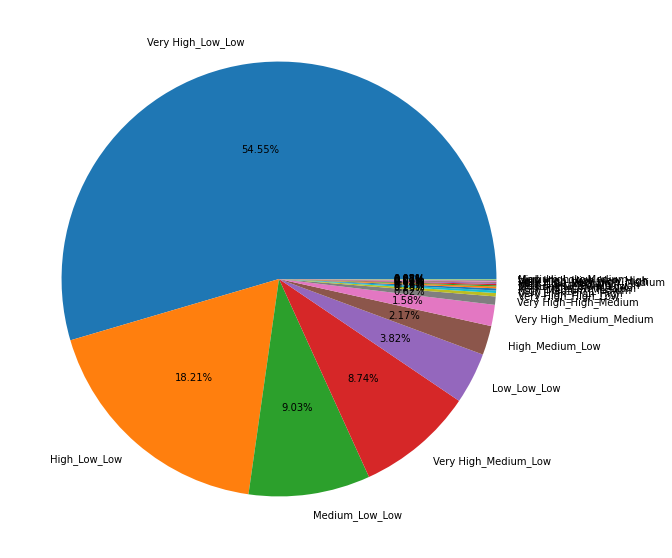

In [ ]:
#split of customers segmentation
customer_segments = result.RFM_labels.value_counts()
plt.rcParams["figure.figsize"] = (20,10)
plt.pie(customer_segments,labels=list(customer_segments.index),autopct='%1.2f%%')
